<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> INTRODUCTION </h2> 

# Oil Price Prediction Using Time Series Forecasting

### Problem Statement

Oil is a product that goes completely in a different direction for a single market event as the oil prices are rarely based on real-time data, instead, it is driven by externalities making our attempt to forecast it even more challenging As the economy will be highly affected by oil prices our model will help to understand the pattern in prices to help the customers and businesses to make smart decisions.

### About Dataset

We took the data of crude oil prices from 1986-2023.

It contains two columns:

Date
Price
Source:https://www.eia.gov/dnav/pet/hist/RWTCD.htm

## <p style='color:white;font-size:1%;'>Import Libraries & Dataset</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> IMPORT LIBRARIES & LOADING DATA </h2> 

Let's import the required libraries....

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Loading data
df = pd.read_excel('Crude_oil_WTI.xls')

In [3]:
df.head(10)

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [4]:
df.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)

In [5]:
display(df.iloc[7550])

Date     2015-12-07 00:00:00
Price                  37.64
Name: 7550, dtype: object

In [6]:
df.tail(10)

,Date,Price
9429,2023-06-06,71.71
9430,2023-06-07,72.52
9431,2023-06-08,71.28
9432,2023-06-09,70.16
9433,2023-06-12,67.08
9434,2023-06-13,69.39
9435,2023-06-14,68.22
9436,2023-06-15,70.61
9437,2023-06-16,71.81
9438,2023-06-20,70.94


## <p style='color:white;font-size:1%;'>Time Series Analysis</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> DATA DESCRIPTION </h2> 

In [7]:
df.shape

(9439, 2)

In [8]:
df.describe()

,Price
count,9439.000000
mean,46.392288
std,29.590250
min,-36.980000
25%,20.040000
50%,36.900000
75%,68.490000
max,145.310000


In [9]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [10]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9439 non-null   datetime64[ns]
 1   Price   9439 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 147.6 KB


## <p style='color:white;font-size:1%;'>Time Series Analysis</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> DATA CLEANING </h2> 

In [12]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [13]:
df.duplicated().sum()

0

The dataset do not contain any null and duplicate values

## <p style='color:white;font-size:1%;'>Time Series Analysis</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> DATA PREPROCESSING </h2> 

In [14]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 0
Float variables: 1


## <p style='color:white;font-size:1%;'>Time Series Analysis</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> FEATURE ENGINEERING </h2> 

In [15]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9434,2023-06-13,69.39
9435,2023-06-14,68.22
9436,2023-06-15,70.61
9437,2023-06-16,71.81


In [16]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9434,2023-06-13,69.39
9435,2023-06-14,68.22
9436,2023-06-15,70.61
9437,2023-06-16,71.81


In [17]:
pd.DatetimeIndex(df.index).year


Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970],
           dtype='int64', length=9439)

In [18]:
pd.DatetimeIndex(df.index).month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=9439)

In [19]:
pd.DatetimeIndex(df.index).day

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=9439)

In [20]:
df

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9434,2023-06-13,69.39
9435,2023-06-14,68.22
9436,2023-06-15,70.61
9437,2023-06-16,71.81


In [21]:
# Add columns with year,month,day and weekday 
df['Year']         = pd.DatetimeIndex(df['Date']).year
df['Month']        = pd.DatetimeIndex(df['Date']).month
df['Day']          = pd.DatetimeIndex(df['Date']).day
df['Weekday'] = pd.DatetimeIndex(df['Date']).day_name()

# Display a random sampling of 10 rows
df.sample(10, random_state=0)

,Date,Price,Year,Month,Day,Weekday
5155,2006-06-05,72.50,2006,6,5,Monday
3812,2001-01-19,32.12,2001,1,19,Friday
7277,2014-11-05,78.71,2014,11,5,Wednesday
3132,1998-05-05,15.48,1998,5,5,Tuesday
8660,2020-05-13,25.37,2020,5,13,Wednesday
4795,2004-12-27,41.26,2004,12,27,Monday
8499,2019-09-20,57.92,2019,9,20,Friday
1812,1993-02-05,20.27,1993,2,5,Friday
4016,2001-11-08,21.21,2001,11,8,Thursday
5970,2009-08-31,69.97,2009,8,31,Monday


In [22]:
df

,Date,Price,Year,Month,Day,Weekday
0,1986-01-02,25.56,1986,1,2,Thursday
1,1986-01-03,26.00,1986,1,3,Friday
2,1986-01-06,26.53,1986,1,6,Monday
3,1986-01-07,25.85,1986,1,7,Tuesday
4,1986-01-08,25.87,1986,1,8,Wednesday
...,...,...,...,...,...,...
9434,2023-06-13,69.39,2023,6,13,Tuesday
9435,2023-06-14,68.22,2023,6,14,Wednesday
9436,2023-06-15,70.61,2023,6,15,Thursday
9437,2023-06-16,71.81,2023,6,16,Friday


## <p style='color:white;font-size:1%;'>Time Series Analysis</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> DATA VISUALIZATION </h2> 

#### Line Plot (Whole data)

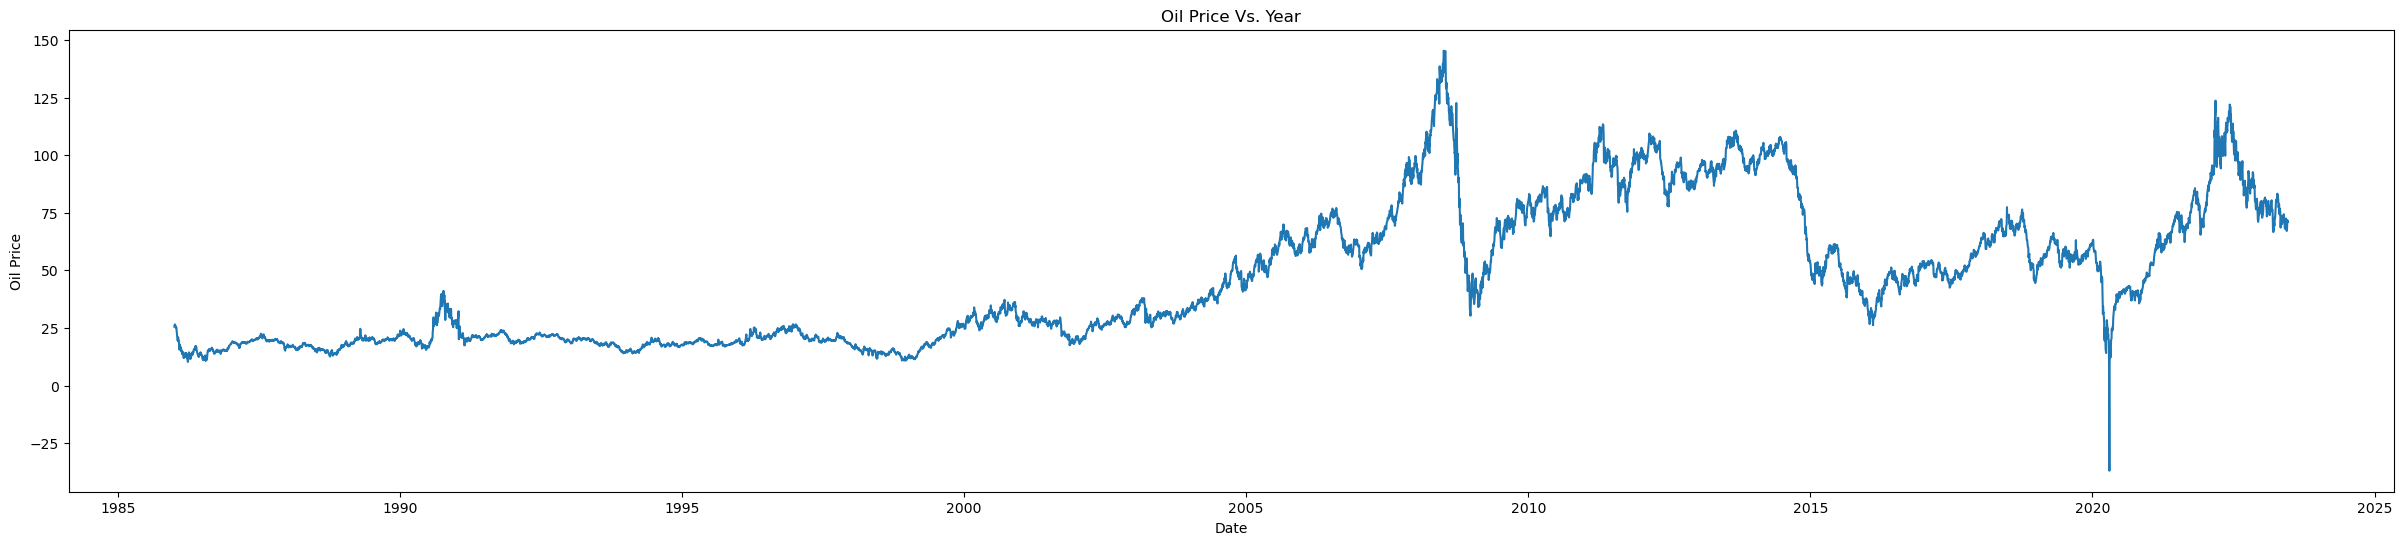

In [23]:
plt.figure(figsize=(30,6))
sns.lineplot(y='Price',x='Date',data=df);
plt.title('Oil Price Vs. Year');
plt.xlabel('Date');
plt.ylabel('Oil Price');

#### Line Plot (1987-1995)

<AxesSubplot:xlabel='Date', ylabel='Price'>

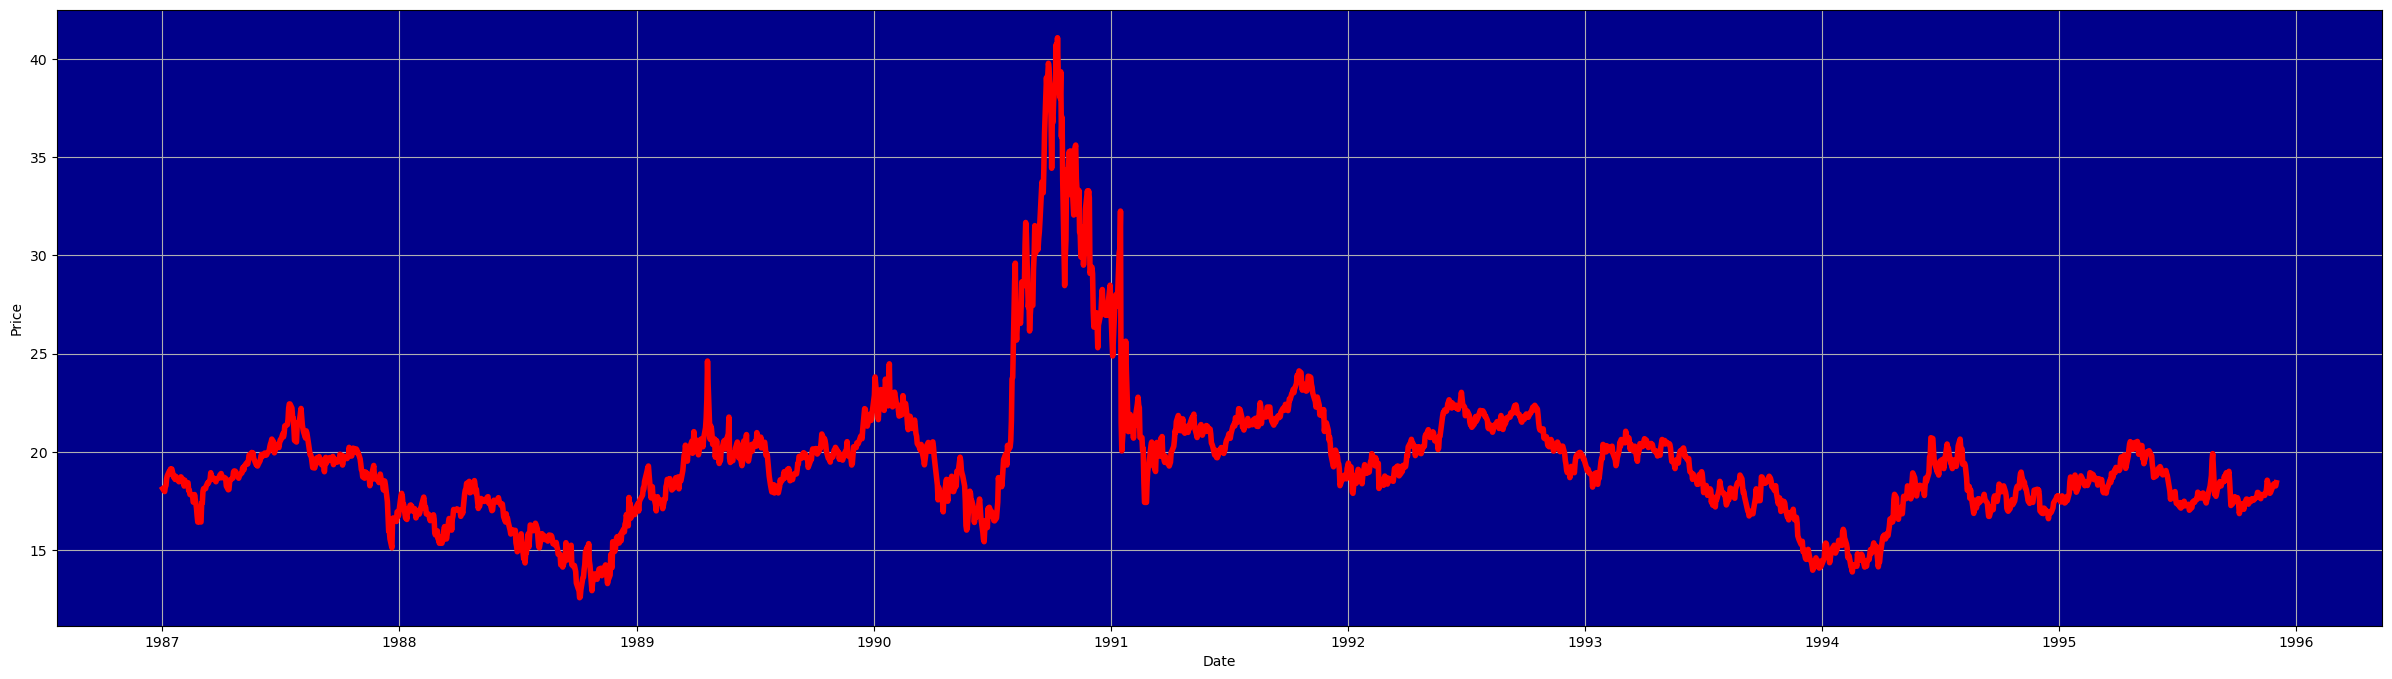

In [24]:
# Select the subset of data between 1987 and 1995
plt.figure(figsize=(30,8))
b1=df1 = df[df['Date'].between('1987-01-01', '1995-12-01')]
ax = plt.axes()
ax.set_facecolor("darkblue")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='Price',x='Date',color='red',linewidth=4.0,data=df1)

From the above line plot we can observe that oil prices hits its extreme low in 1986, and then around 1990 the oil price surged and prices experienced significant volatility and surged to their highest levels between the priod between 1990 & 1991.

#### Line Plot (1995-2005)

<AxesSubplot:xlabel='Date', ylabel='Price'>

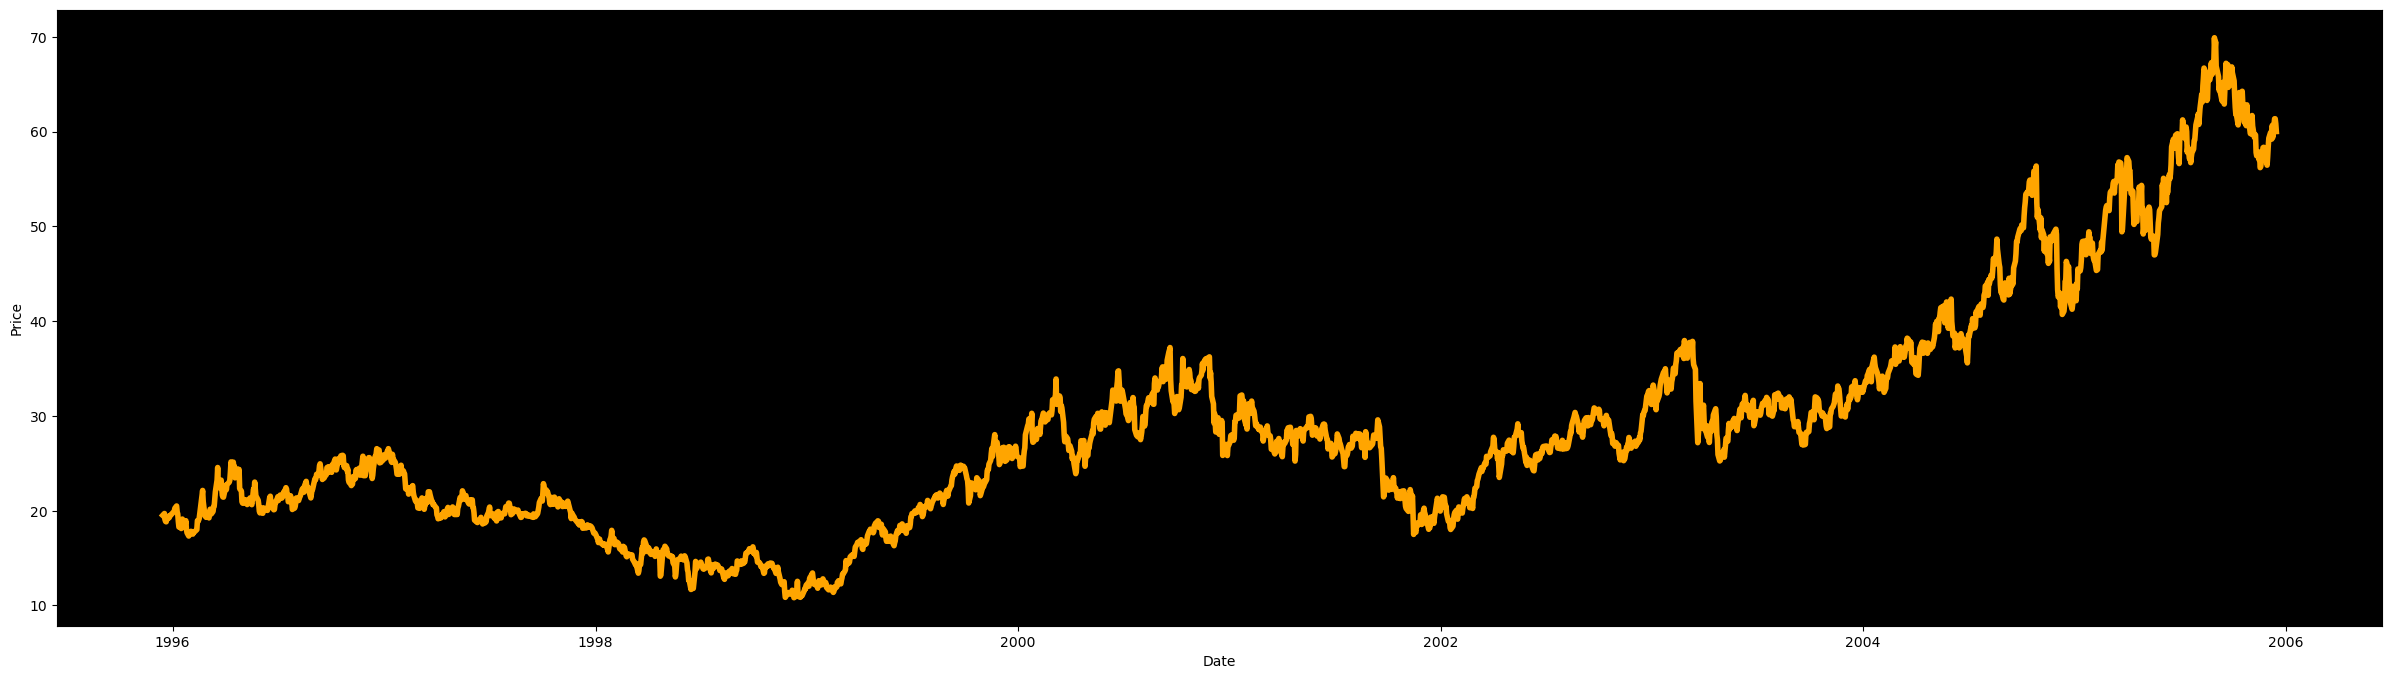

In [25]:
# Select the subset of data between 1995 and 2005
plt.figure(figsize=(30,8))
b2=df1 = df[df['Date'].between('1995-12-15', '2005-12-15')]
ax = plt.axes()
ax.set_facecolor("black")
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='Price',x='Date',color='orange',linewidth=4.0,data=df1)

#### Line Plot (2000-2007)

<AxesSubplot:xlabel='Date', ylabel='Price'>

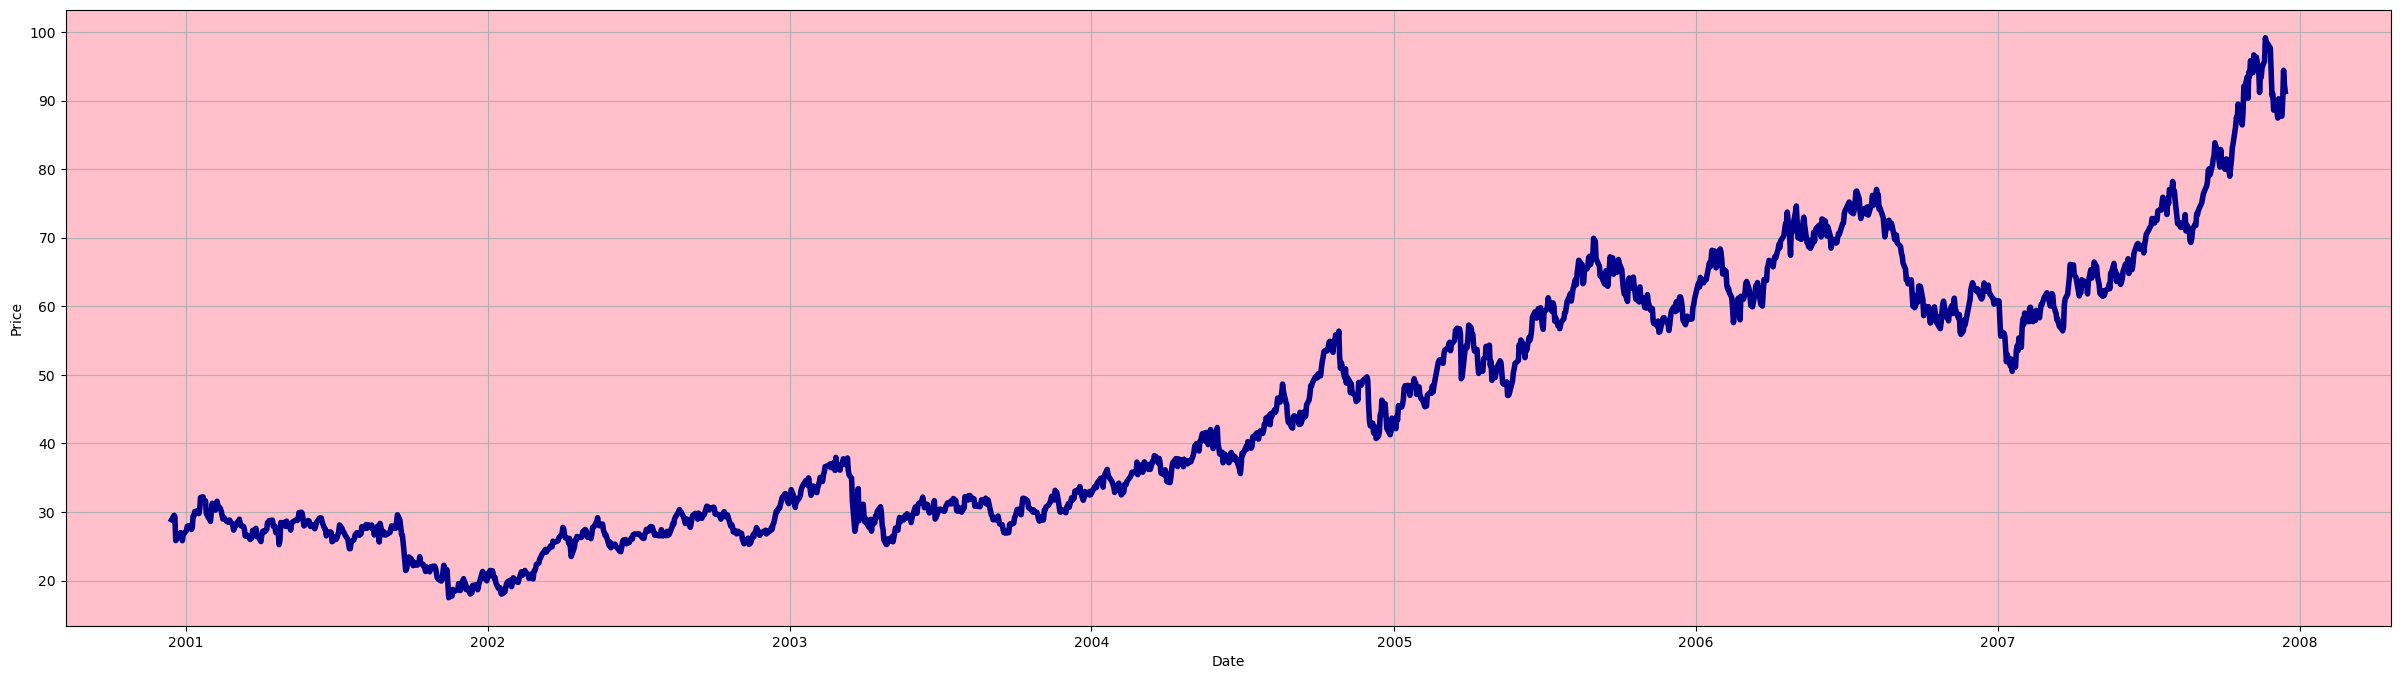

In [26]:
# Select the subset of data between 2000 and 2007
plt.figure(figsize=(30,8))
b3=df1 = df[df['Date'].between('2000-12-15', '2007-12-15')]
ax = plt.axes()
ax.set_facecolor("pink")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='Price',x='Date',color='darkblue',linewidth=4.0,data=df1)

#### Line Plot (2007-2009:Recession Phase)

<AxesSubplot:xlabel='Date', ylabel='Price'>

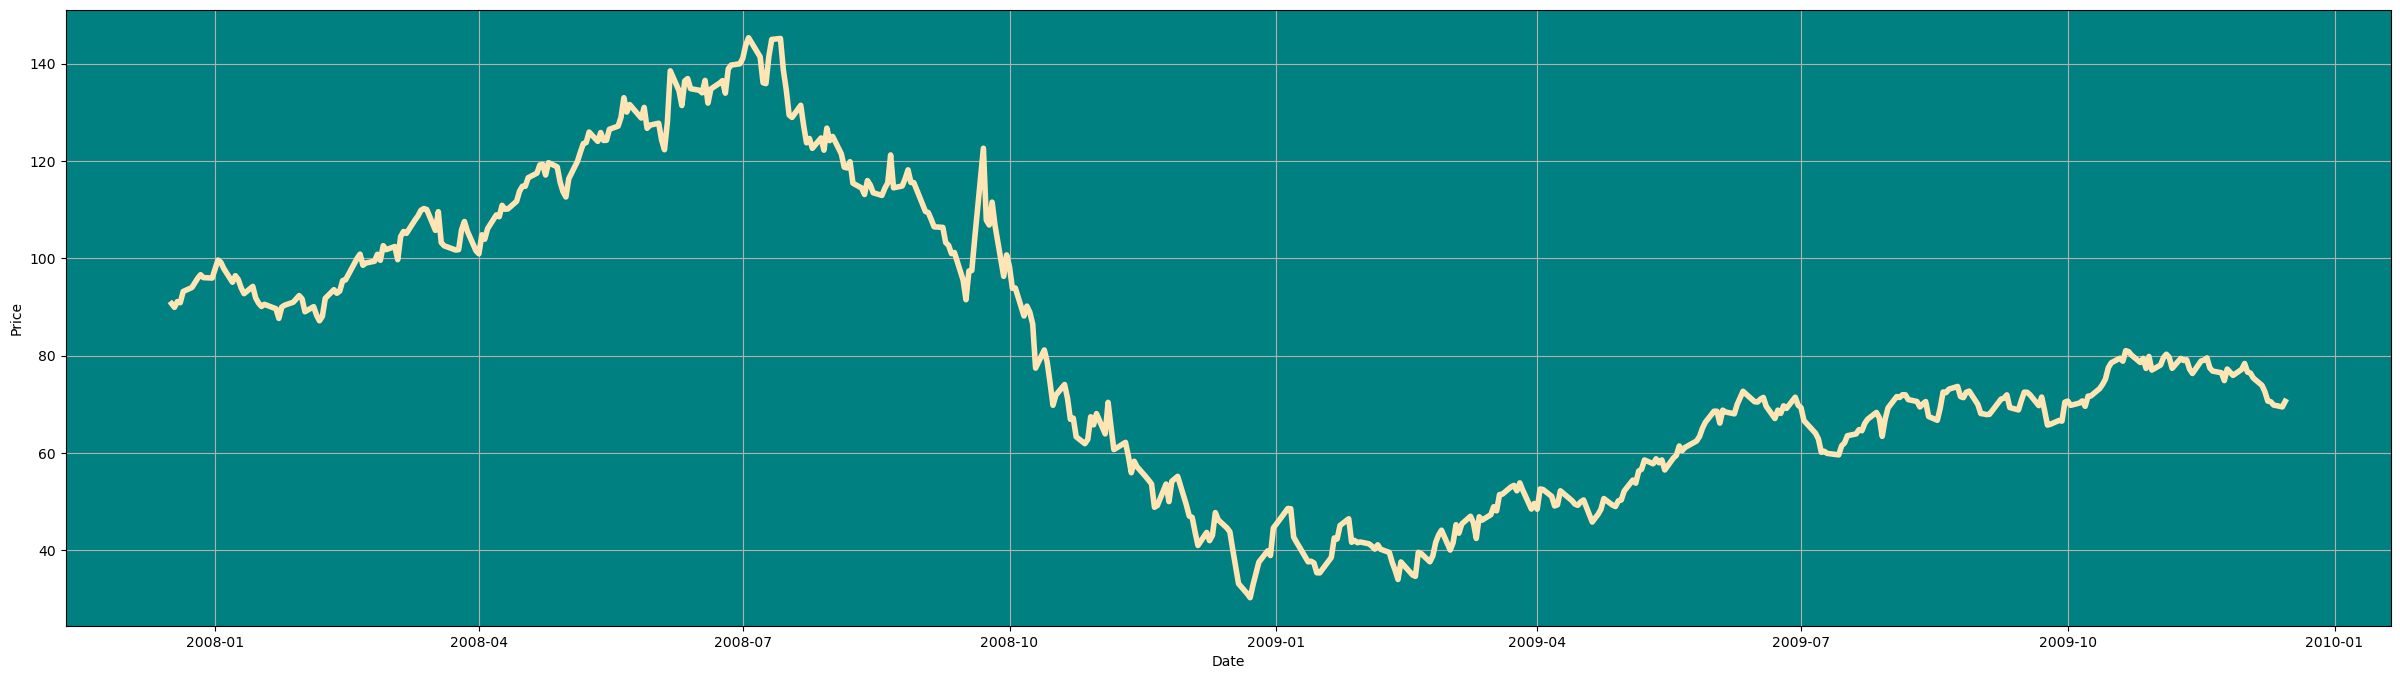

In [27]:
# Select the subset of data between 2007 and 2009 Recession Phase
plt.figure(figsize=(30,8))
b4=df1 = df[df['Date'].between('2007-12-15', '2009-12-15')]
ax = plt.axes()
ax.set_facecolor("teal")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='Price',x='Date',color='#FFE5B4',linewidth=4.0,data=df1)

From the above line plot we can clearly see the sudden decrease in oil prices, it is because the period between 2008-2009 is Recession Phase

#### Line Plot (2019-2021:Covid Pandemic Phase)

<AxesSubplot:xlabel='Date', ylabel='Price'>

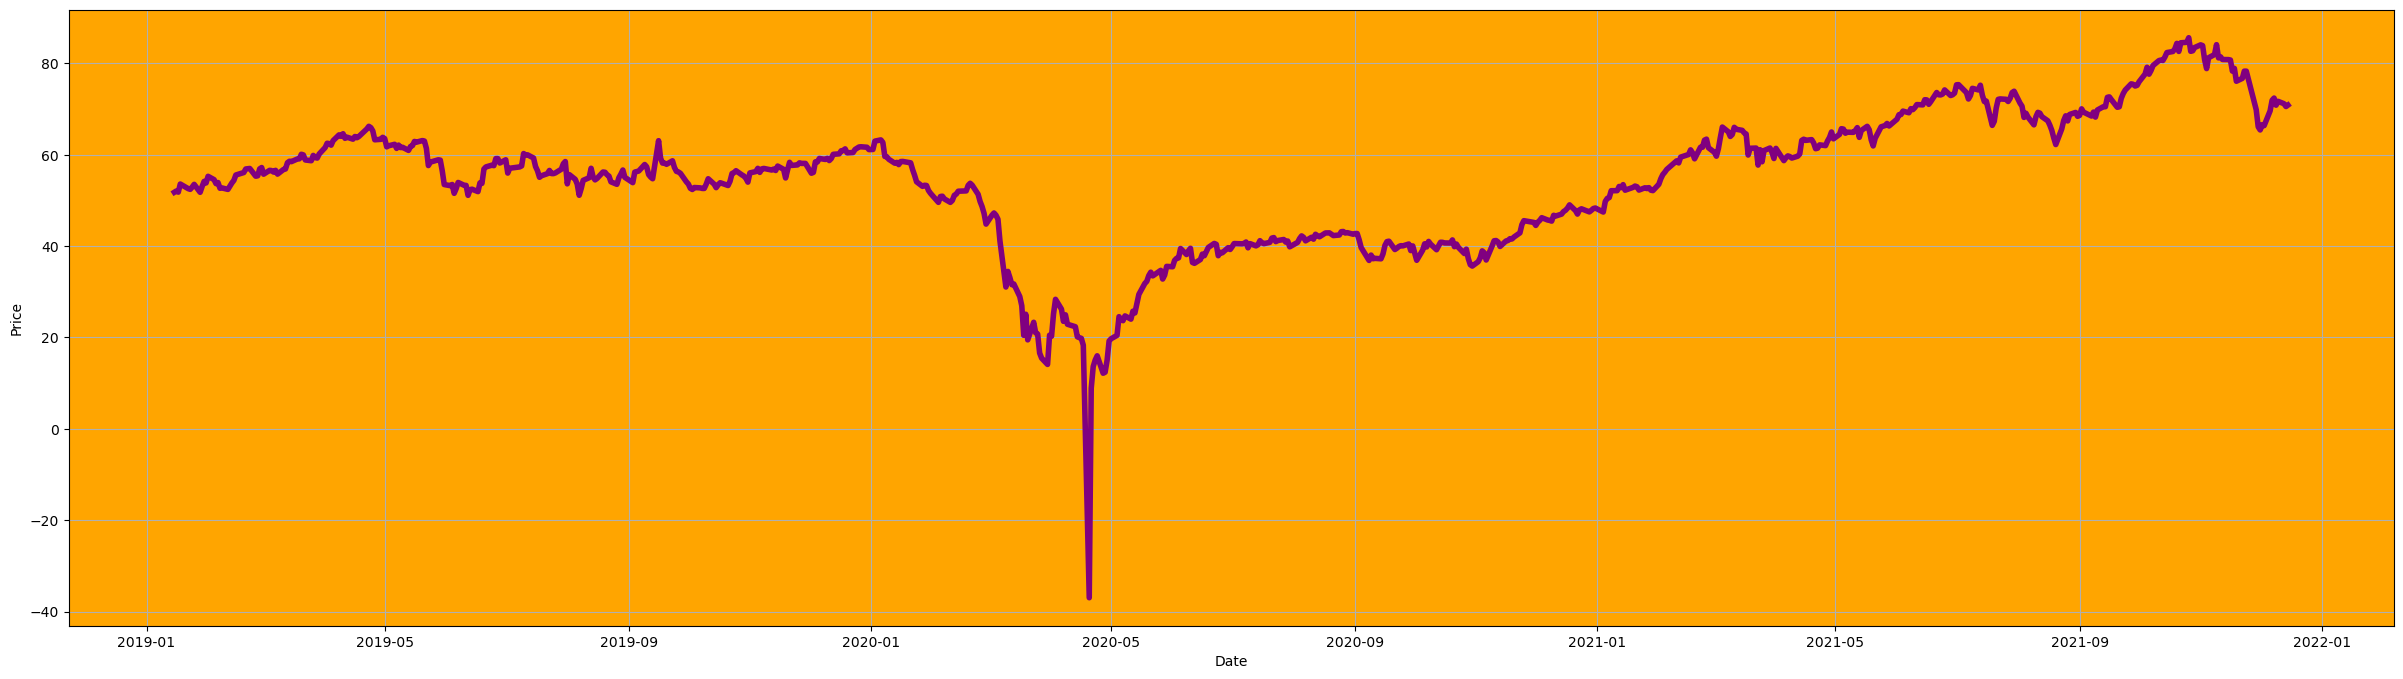

In [28]:
# Select the subset of data between 2019 and 2021
plt.figure(figsize=(30,8))
b5=df1 = df[df['Date'].between('2019-01-15', '2021-12-15')]
ax = plt.axes()
ax.set_facecolor("orange")
plt.grid()
# Plot the time series in your DataFrame as a blue area chart
sns.lineplot(y='Price',x='Date',color='purple',linewidth=4.0,data=df1)

From the above line plot we can clearly see the sudden dip in oil prices since it was a pandemic phase where oil demand suddenly decrease all over world and it directly affects oil prices.

#### Histogram

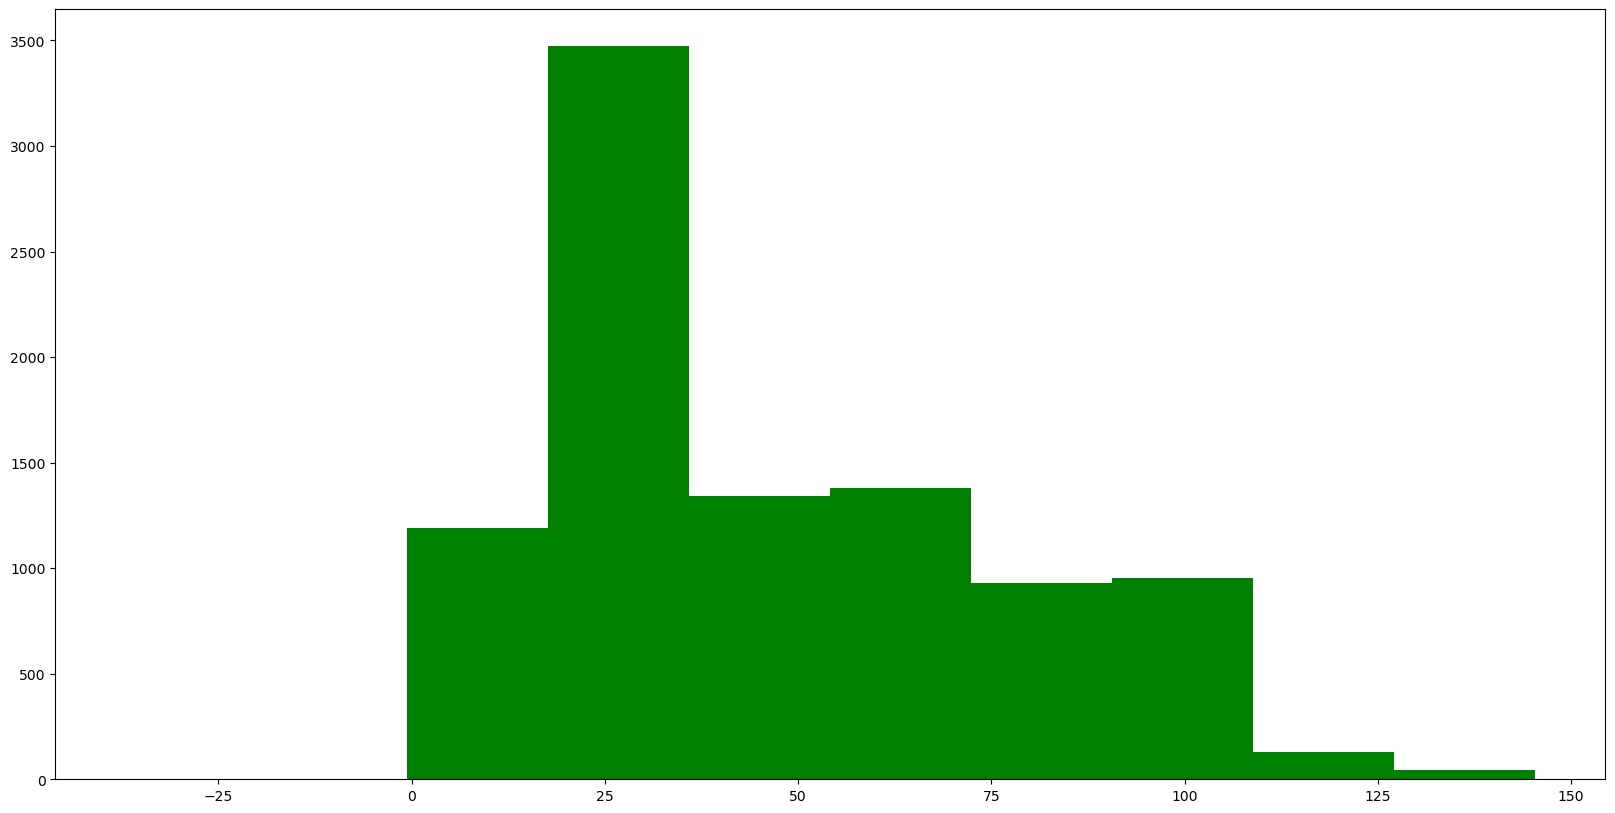

In [29]:
plt.figure(figsize=(20,10))
plt.hist(df['Price'],color='green')
plt.show()

#### Distplot

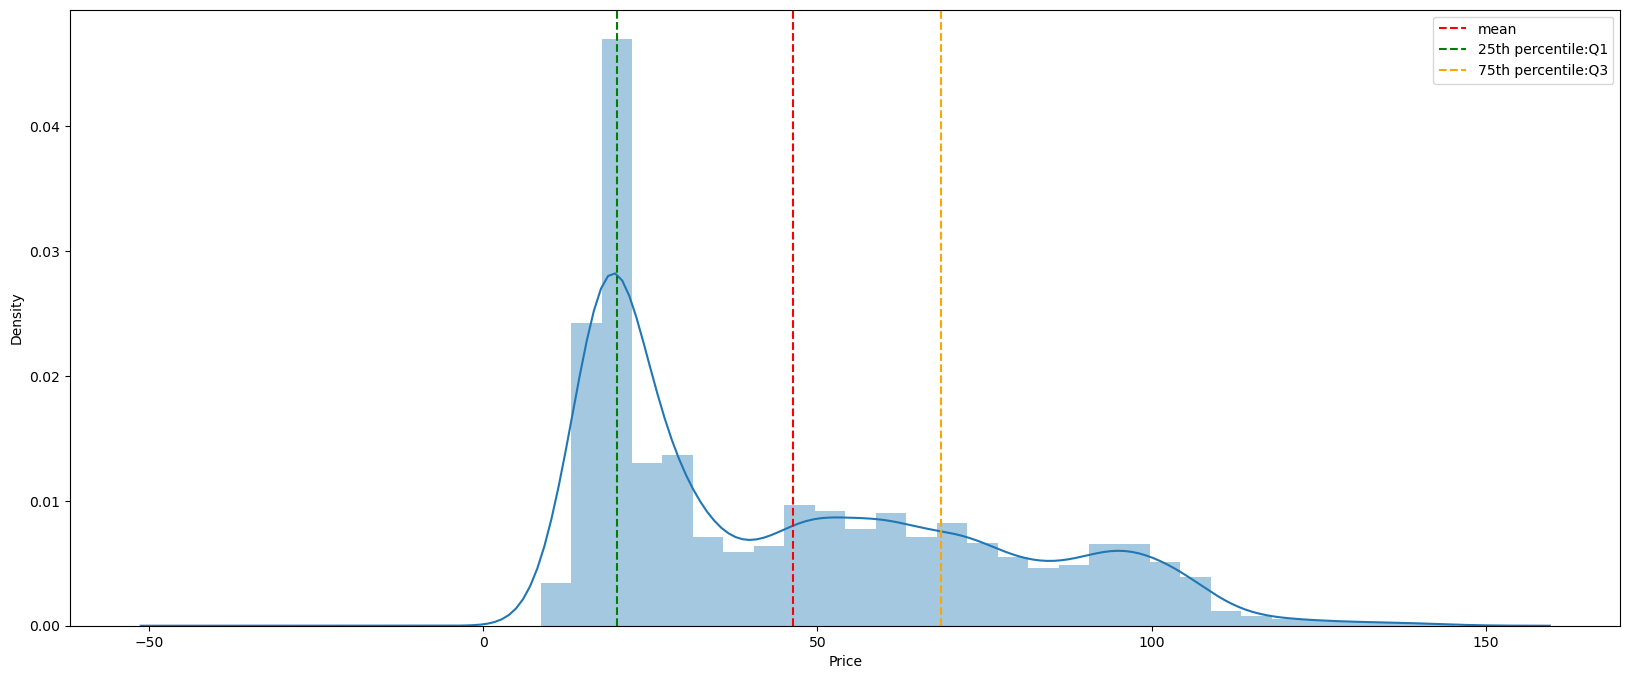

In [30]:
plt.figure(figsize=(20,8))
sns.distplot(df['Price'])
plt.axvline(x=np.mean(df['Price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()
plt.show()

We can see from above's Distplot Data is not normally distributed.

#### Scatter Plot

<Figure size 4000x1000 with 0 Axes>

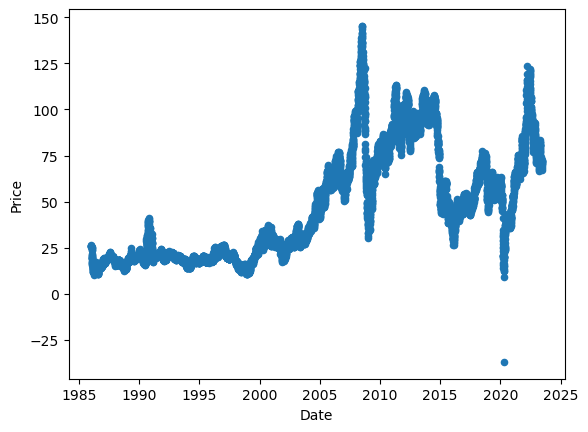

In [31]:
plt.figure(figsize=(40,10))
df.plot(kind='scatter',x='Date',y='Price')
plt.show()

#### Cat Plot 

Visualizing the sum of all sales each year, We can do that using group of "Price" and "Date" and group by "Year"

In [32]:
df_year = df[['Price','Year']].groupby(by='Year').sum().reset_index()

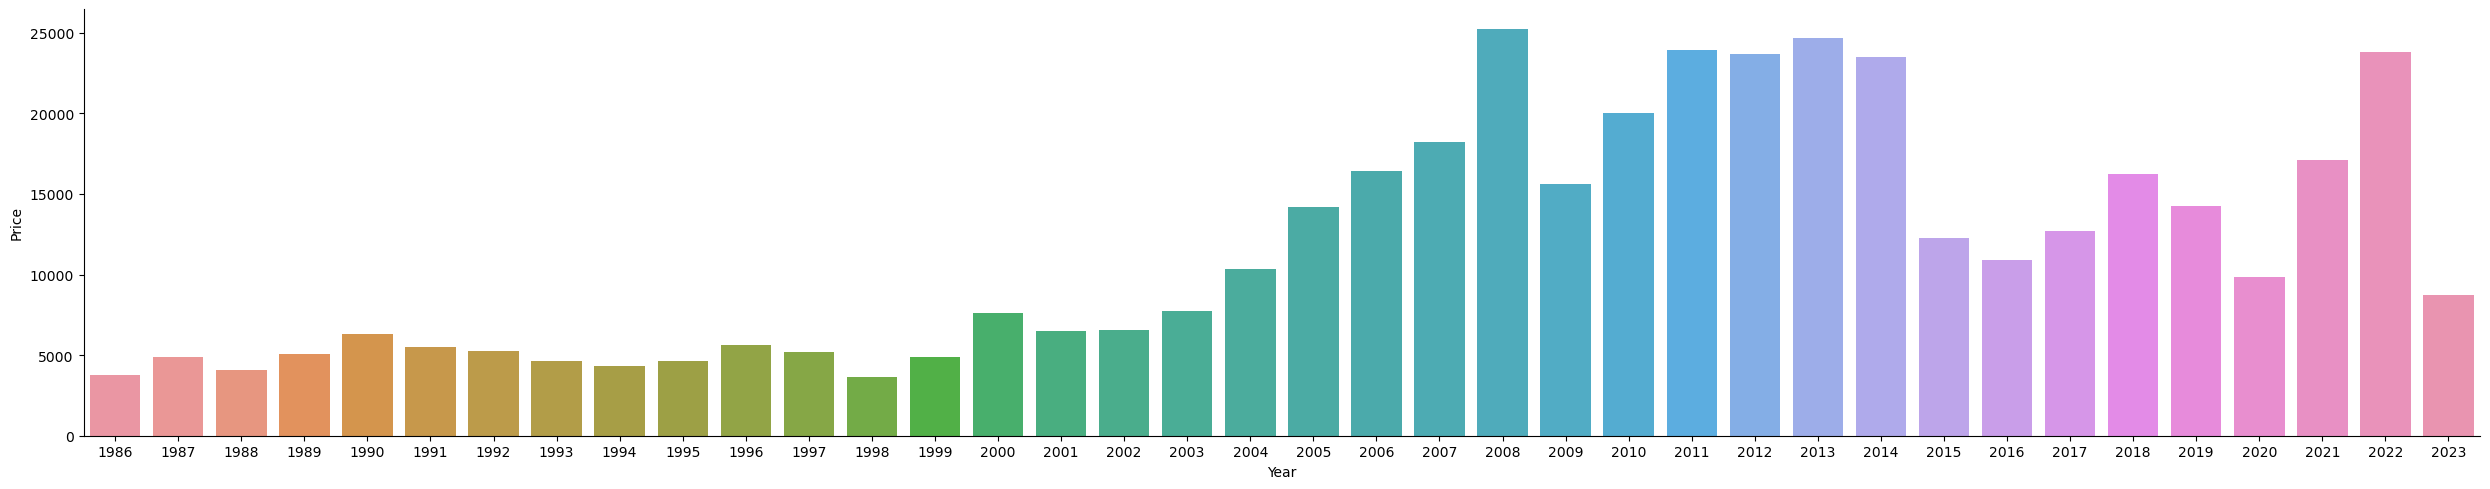

In [33]:
sns.catplot(x='Year',y='Price',data=df_year,kind='bar',aspect=5)

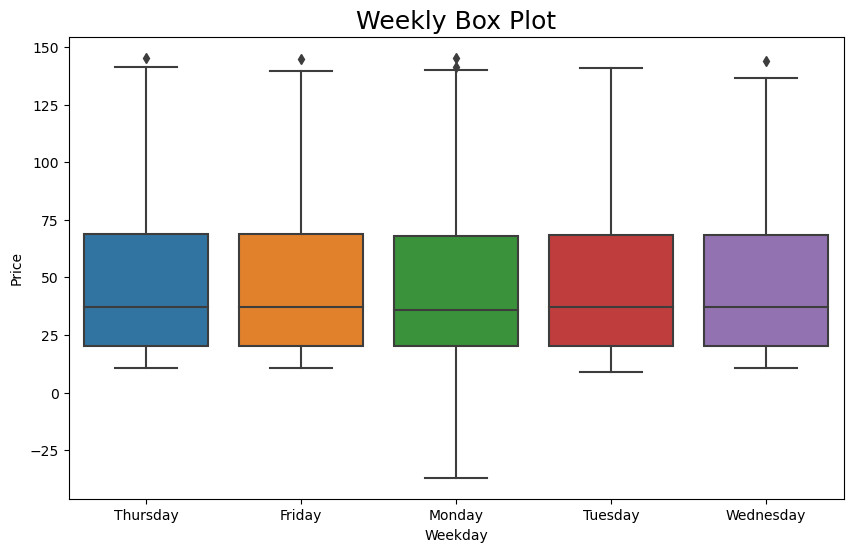

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Weekday',y='Price',data=df)
plt.title('Weekly Box Plot', fontsize=18)
plt.show()

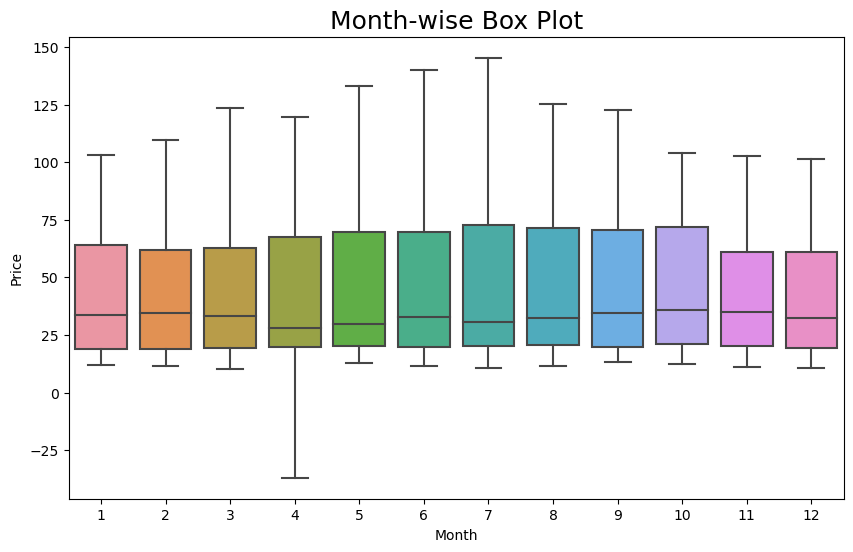

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='Price', data=df.loc[~df.Year.isin([2016, 2021]), :])
plt.title('Month-wise Box Plot', fontsize=18)
plt.show()

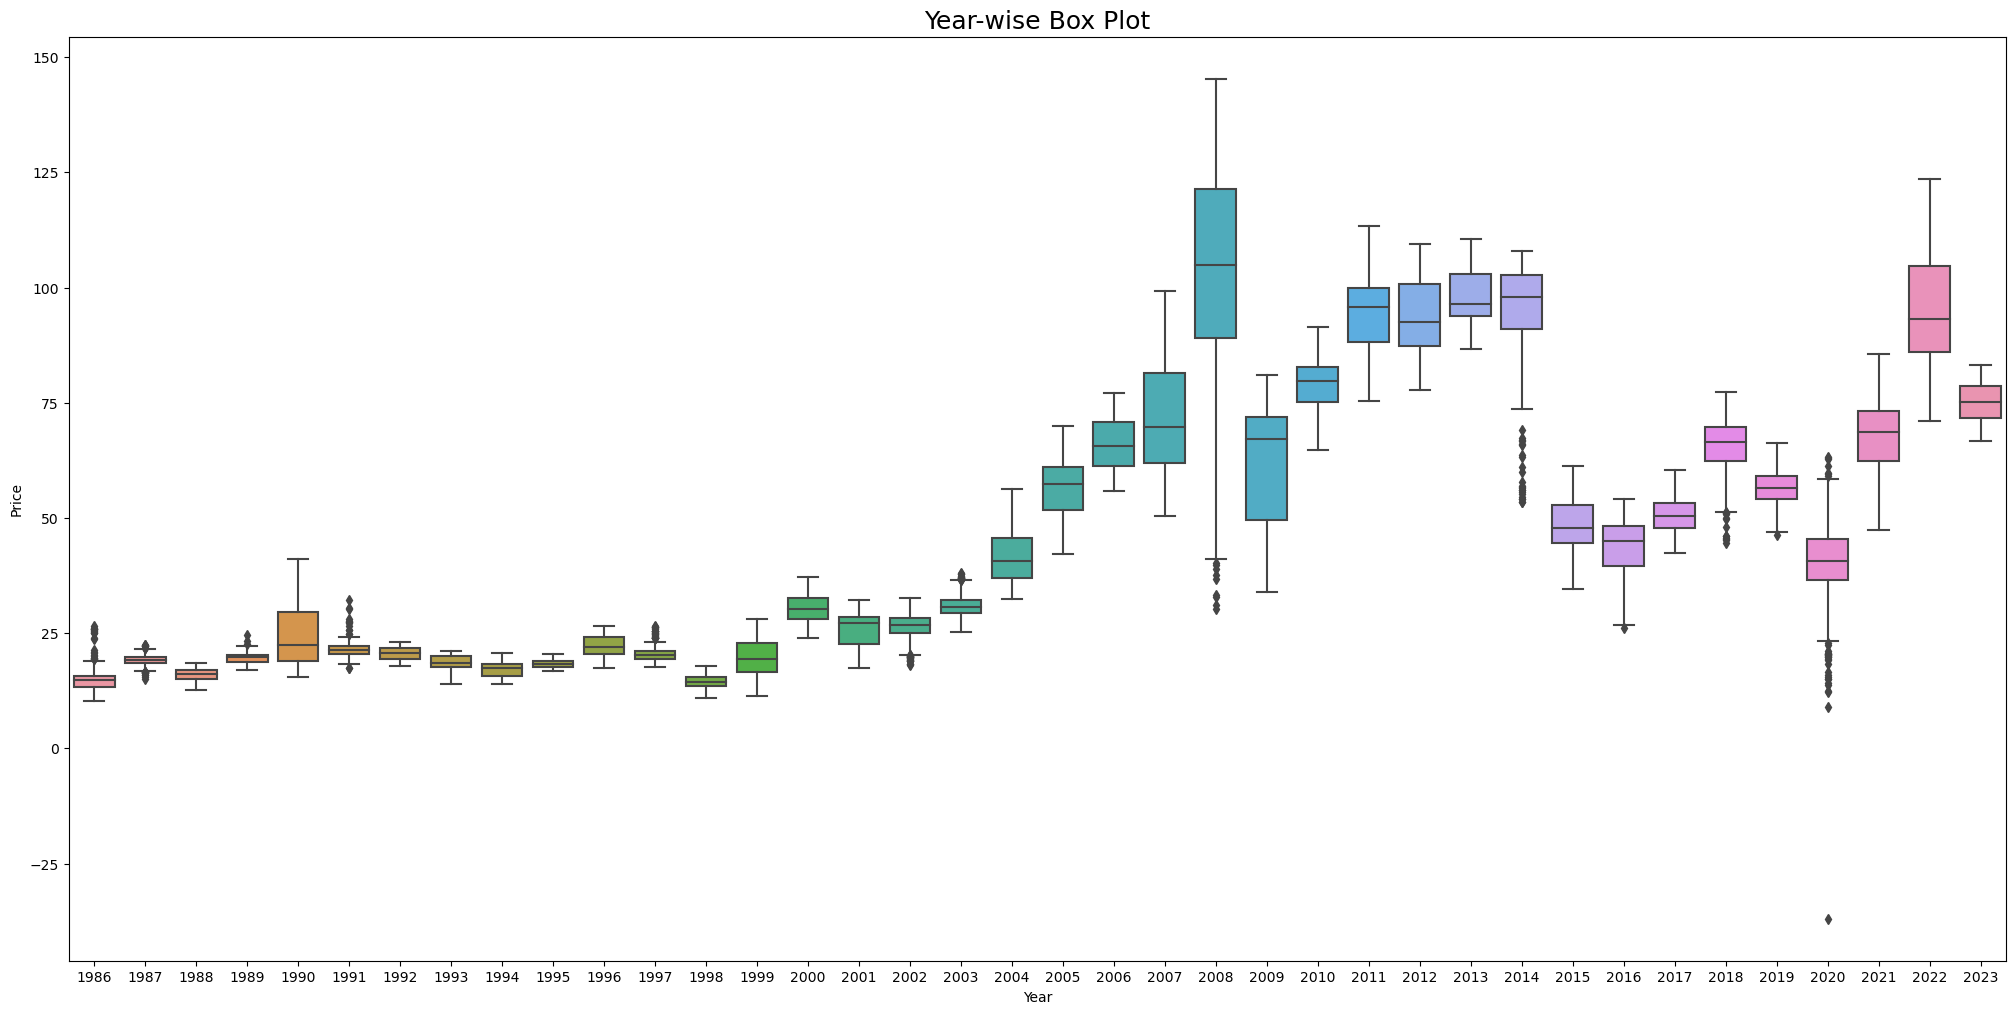

In [36]:
plt.figure(figsize=(25,12))
sns.boxplot(x='Year', y='Price', data=df)
plt.title('Year-wise Box Plot',fontsize=18)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the month of July has the highest Oil Prices while the month of December, comparitively has lower Oil Prices.

#### Correlation Plot

To find the correaltion among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [37]:
df.corr()

,Price,Year,Month,Day
Price,1.000000,0.726896,0.006404,0.000945
Year,0.726896,1.000000,-0.018011,-0.001551
Month,0.006404,-0.018011,1.000000,-0.005134
Day,0.000945,-0.001551,-0.005134,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

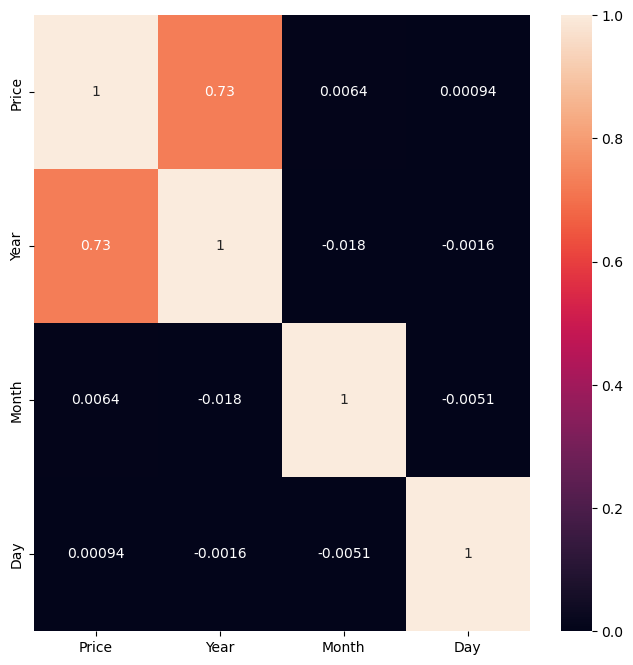

In [38]:
corr_matrix=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr_matrix,annot=True,vmin=0)
plt.show

## <p style='color:white;font-size:1%;'>Time Series Analysis</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> OUTLIER DETECTION </h2> 

In [39]:
# Compute the first and third quartiles of the Price column
q1, q3 = df['Price'].quantile([0.25, 0.75])

# Compute the IQR
iqr = q3 - q1

# Set the lower and upper bounds for detecting outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find the rows with Price values that are outside the bounds
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Print the rows with outliers
print(outliers)

           Date   Price  Year  Month  Day    Weekday
5677 2008-07-02  143.74  2008      7    2  Wednesday
5678 2008-07-03  145.31  2008      7    3   Thursday
5679 2008-07-07  141.38  2008      7    7     Monday
5682 2008-07-10  141.47  2008      7   10   Thursday
5683 2008-07-11  144.96  2008      7   11     Friday
5684 2008-07-14  145.16  2008      7   14     Monday


Since, these values not affecting our data we will not remove those values.

In [40]:
df.drop(columns=["Year","Month","Weekday","Day"],inplace=True)

In [41]:
df

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9434,2023-06-13,69.39
9435,2023-06-14,68.22
9436,2023-06-15,70.61
9437,2023-06-16,71.81


In [42]:
df=df.set_index("Date")
df.head()

,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


## <p style='color:white;font-size:1%;'>Time Series Analysis</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> TIME SERIES ANALYSIS </h2> 

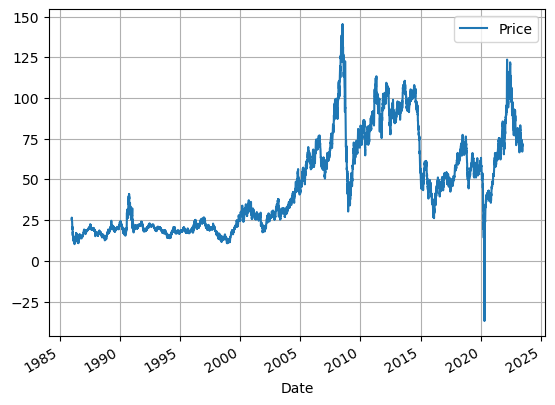

In [43]:
df.plot(grid=True);

Time Series Decomposition:

A time series is usually composed of the following components:

1) Trend : This component usually is increasing, decreasing, or constant.

2) Seasonality : This is the periodic behavior of the time series that occurs within a year.

3) Residual : This is what remains of the time series after the trend and seasonality are removed.


The basic approach to seasonal decomposition splits the time series into above components.

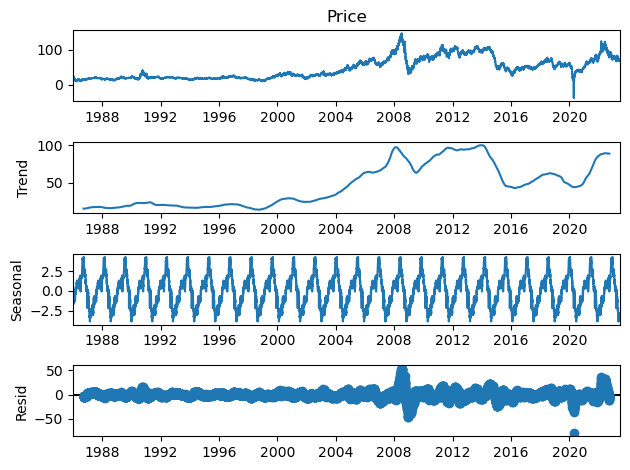

In [44]:
result = seasonal_decompose(df.Price,model="additive",period=365)
result.plot()
plt.show()

## Stationary Time Series :
    
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict

Sign of obvious trends, seasonality, or other systematic structures in the series are indicators of a non-stationary series. A more accurate method would be to use a statistical test, such as the Dickey-Fuller test.


## ADFuller Test:

If Test statistic < Critical Value and p-value < 0.05 – then series is stationary

In [45]:
from statsmodels.tsa.stattools import adfuller
# functon for adf test
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)
    
# calling adf function and passing series
adf_test(df.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                   -2.410399
p-value                           0.138823
#Lags Used                       38.000000
Number of Observations Used    9400.000000
Critical Value (1%)              -3.431046
Critical Value (5%)              -2.861848
Critical Value (10%)             -2.566934
dtype: float64


## Differencing :

Differencing is a method of transforming a time series dataset. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

In [46]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Price,test="adf") # ndiff gives the order of differencing

1

In [47]:
diff_df = df.diff().dropna() #first differencing for stationarity
diff_df.head()

,Price
Date,
1986-01-03,0.44
1986-01-06,0.53
1986-01-07,-0.68
1986-01-08,0.02
1986-01-09,0.16


In [48]:
diff_df.dropna(inplace=True) # depending on your differenced order you might have 1,2 or 3 null values, remove those

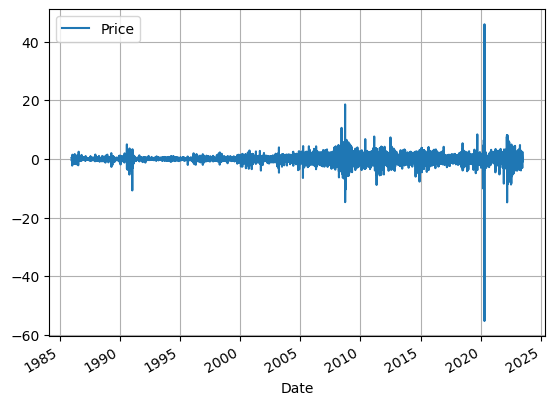

In [49]:
diff_df.plot(grid=True);

In [50]:
# call the adf_test function and pass differenced series
adf_test(diff_df)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                -1.335678e+01
p-value                        5.528564e-25
#Lags Used                     3.800000e+01
Number of Observations Used    9.399000e+03
Critical Value (1%)           -3.431046e+00
Critical Value (5%)           -2.861848e+00
Critical Value (10%)          -2.566934e+00
dtype: float64


<div style="color:white;
           display:fill;
           background-color:black;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observation 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           The p-value obtained is less than significance level of 0.05 and the ADF statistic is less than any of the critical values. Hence the first ordered differenced series is stationary and d=1<br>
         </p>
    </div>

**Autocorrelation and Partial Autocorrelation Function:**  
Autocorrelation and partial autocorrelation are plots that graphically summarize the impact of observations at prior timesteps on the observations we are trying to predict.

**ACF plot gives the q value and PACF gives the p value**  
Look for tail of pattern in either ACF or PACF. If tail is crossing the blue region then it will give us potential p and q values.

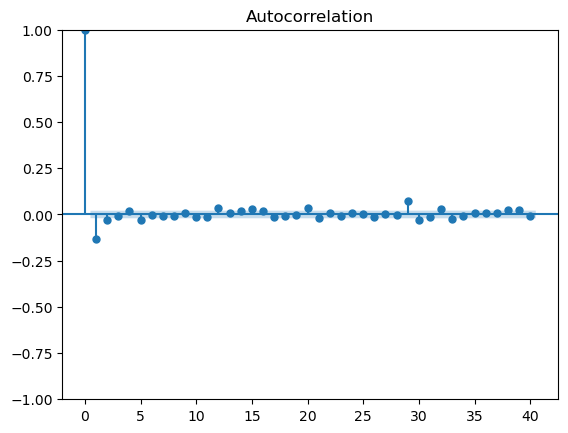

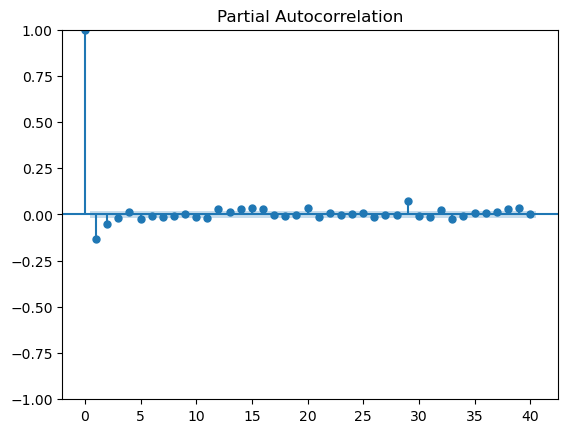

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# if the series is not stationary then make sure to pass differenced series instead of original series
plot_acf(diff_df);
plot_pacf(diff_df);

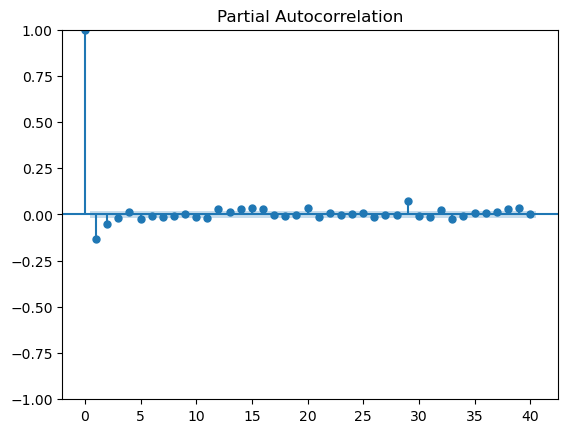

In [52]:
plot_pacf(diff_df);

In [53]:
rolling_mean = df.rolling(window =365).mean()
rolling_std= df.rolling(window =365).std()

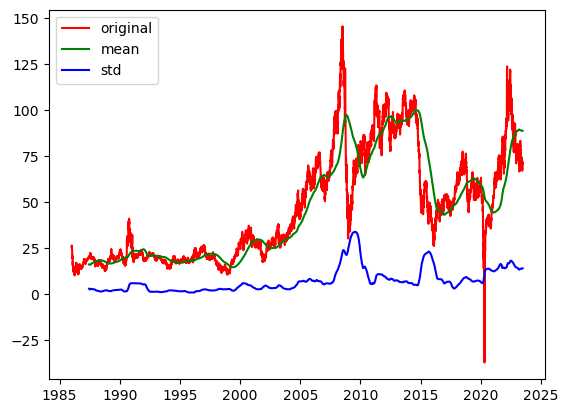

In [54]:
plt.plot(df.Price,color='red',label='original')
plt.plot(rolling_mean,color="green",label="mean")
plt.plot(rolling_std,color="blue",label="std")
plt.legend(loc='best')